# Библиотеки

In [32]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split
import tensorflow.keras as keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
import matplotlib.pyplot as plt

# Работа с датасетом

### Загрузим датасет

In [2]:
data = pd.read_csv('https://raw.githubusercontent.com/AnLiMan/Machine-Learning-Course/main/Datasets/Iris.csv')

### Отобразим первые 5 элементов

In [3]:
print(data.head())

   Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
0   1            5.1           3.5            1.4           0.2  Iris-setosa
1   2            4.9           3.0            1.4           0.2  Iris-setosa
2   3            4.7           3.2            1.3           0.2  Iris-setosa
3   4            4.6           3.1            1.5           0.2  Iris-setosa
4   5            5.0           3.6            1.4           0.2  Iris-setosa


### Отобразим информацию о нём

In [4]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB
None


### Отобразим размерность датасета

In [5]:
print("Размерность = ", data.shape)

Размерность =  (150, 6)


### Проверка на нулевые и отсутствующие значения.

In [6]:
print(data.isna().sum())

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64


### Проверка дубликатов

In [7]:
print(data.duplicated(keep = False).value_counts())
print(data[data.duplicated(keep = False)])

False    150
dtype: int64
Empty DataFrame
Columns: [Id, SepalLengthCm, SepalWidthCm, PetalLengthCm, PetalWidthCm, Species]
Index: []


### Выбросим дубликаты из датаста и отобразим новую размерность

In [8]:
data = data.drop_duplicates(keep = 'first').copy()
print(data.shape)

(150, 6)


### Сброс индекса кадра данных

In [9]:
data = data.reset_index(drop = True)

### Разделим датасет на независимые переменные (X) и целевую функцию (Y)

In [10]:
X = data.iloc[:, 1:5].values
y = data['Species'].values

### Размерности полученных данных

In [11]:
print("Рамерность Х, строки(общее количество значений), колонны (количество независимых переменных) = " + str(X.shape))
print("Рамерность Y, строки(общее количество значений), колонны (количество зависмых переменных) = " + str(y.shape))

Рамерность Х, строки(общее количество значений), колонны (количество независимых переменных) = (150, 4)
Рамерность Y, строки(общее количество значений), колонны (количество зависмых переменных) = (150,)


In [15]:
print("Значения Х ")
print(X)

Значения Х 
[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.4 3.7 1.5 0.2]
 [4.8 3.4 1.6 0.2]
 [4.8 3.  1.4 0.1]
 [4.3 3.  1.1 0.1]
 [5.8 4.  1.2 0.2]
 [5.7 4.4 1.5 0.4]
 [5.4 3.9 1.3 0.4]
 [5.1 3.5 1.4 0.3]
 [5.7 3.8 1.7 0.3]
 [5.1 3.8 1.5 0.3]
 [5.4 3.4 1.7 0.2]
 [5.1 3.7 1.5 0.4]
 [4.6 3.6 1.  0.2]
 [5.1 3.3 1.7 0.5]
 [4.8 3.4 1.9 0.2]
 [5.  3.  1.6 0.2]
 [5.  3.4 1.6 0.4]
 [5.2 3.5 1.5 0.2]
 [5.2 3.4 1.4 0.2]
 [4.7 3.2 1.6 0.2]
 [4.8 3.1 1.6 0.2]
 [5.4 3.4 1.5 0.4]
 [5.2 4.1 1.5 0.1]
 [5.5 4.2 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.  3.2 1.2 0.2]
 [5.5 3.5 1.3 0.2]
 [4.9 3.1 1.5 0.1]
 [4.4 3.  1.3 0.2]
 [5.1 3.4 1.5 0.2]
 [5.  3.5 1.3 0.3]
 [4.5 2.3 1.3 0.3]
 [4.4 3.2 1.3 0.2]
 [5.  3.5 1.6 0.6]
 [5.1 3.8 1.9 0.4]
 [4.8 3.  1.4 0.3]
 [5.1 3.8 1.6 0.2]
 [4.6 3.2 1.4 0.2]
 [5.3 3.7 1.5 0.2]
 [5.  3.3 1.4 0.2]
 [7.  3.2 4.7 1.4]
 [6.4 3.2 4.5 1.5]


In [16]:
print("Значения Y")
print(y)

Значения Y
['Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor' 'Iris

### Нормализация X (перевод значений в диапазон от 0 до 1)

Нормализация входных параметров важна для улучшения стабильности и скорости сходимости обучения. Если входные данные не нормализованы, то некоторые параметры могут иметь большой диапазон значений, что может привести к проблемам в обучении нейронной сети. Например, градиенты могут стать слишком большими или маленькими, что приведет к проблемам в оптимизации и ухудшению точности предсказаний.

Нормализация также позволяет ускорить процесс обучения, поскольку сходимость алгоритма оптимизации может быть улучшена. Правильно нормализованные данные также могут помочь в избежании проблемы переобучения, что может возникнуть, если входные данные не имеют хорошей репрезентативности.

Подробнее https://www.mql5.com/ru/articles/12459#:~:text=%D0%9D%D0%BE%D1%80%D0%BC%D0%B0%D0%BB%D0%B8%D0%B7%D0%B0%D1%86%D0%B8%D1%8F%20%D0%B2%D1%85%D0%BE%D0%B4%D0%BD%D1%8B%D1%85%20%D0%BF%D0%B0%D1%80%D0%B0%D0%BC%D0%B5%D1%82%D1%80%D0%BE%D0%B2%20%D0%B2%D0%B0%D0%B6%D0%BD%D0%B0%20%D0%B4%D0%BB%D1%8F,%D0%BE%D0%BF%D1%82%D0%B8%D0%BC%D0%B8%D0%B7%D0%B0%D1%86%D0%B8%D0%B8%20%D0%B8%20%D1%83%D1%85%D1%83%D0%B4%D1%88%D0%B5%D0%BD%D0%B8%D1%8E%20%D1%82%D0%BE%D1%87%D0%BD%D0%BE%D1%81%D1%82%D0%B8%20%D0%BF%D1%80%D0%B5%D0%B4%D1%81%D0%BA%D0%B0%D0%B7%D0%B0%D0%BD%D0%B8%D0%B9

In [18]:
scaler = MinMaxScaler()
scaler.fit(X)
X_scaled = scaler.fit_transform(X)

In [19]:
print("Нормализованные входные данные")
print(X_scaled)

Нормализованные входные данные
[[0.22222222 0.625      0.06779661 0.04166667]
 [0.16666667 0.41666667 0.06779661 0.04166667]
 [0.11111111 0.5        0.05084746 0.04166667]
 [0.08333333 0.45833333 0.08474576 0.04166667]
 [0.19444444 0.66666667 0.06779661 0.04166667]
 [0.30555556 0.79166667 0.11864407 0.125     ]
 [0.08333333 0.58333333 0.06779661 0.08333333]
 [0.19444444 0.58333333 0.08474576 0.04166667]
 [0.02777778 0.375      0.06779661 0.04166667]
 [0.16666667 0.45833333 0.08474576 0.        ]
 [0.30555556 0.70833333 0.08474576 0.04166667]
 [0.13888889 0.58333333 0.10169492 0.04166667]
 [0.13888889 0.41666667 0.06779661 0.        ]
 [0.         0.41666667 0.01694915 0.        ]
 [0.41666667 0.83333333 0.03389831 0.04166667]
 [0.38888889 1.         0.08474576 0.125     ]
 [0.30555556 0.79166667 0.05084746 0.125     ]
 [0.22222222 0.625      0.06779661 0.08333333]
 [0.38888889 0.75       0.11864407 0.08333333]
 [0.22222222 0.75       0.08474576 0.08333333]
 [0.30555556 0.58333333 0.118

### Преобразование Y с помощью LabelEncoder (текст переводятся в метки (числа))

In [20]:
encoder = LabelEncoder()
y_encoded = encoder.fit_transform(y)

In [ ]:
print("Новые метки")
print(y_encoded)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


### Категоривание меток(количество категорий = количеству меток полученных ранее - 0,1,2)

In [21]:
num_categories = 3
y_onehot = keras.utils.to_categorical(y_encoded, num_categories)

In [22]:
print("Новое представление Y")
print(y_onehot)

Новое представление Y
[[1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1

### Преобразование X_scaled и y_onehot в train и valid данные.

In [23]:
X_train, X_valid, y_train, y_valid = train_test_split(X_scaled, y_onehot,
                                                     test_size = 0.2,
                                                     random_state = 42)

In [24]:
print("Тренировочные данные")
print(X_train)

Тренировочные данные
[[0.08333333 0.66666667 0.         0.04166667]
 [0.38888889 1.         0.08474576 0.125     ]
 [0.66666667 0.45833333 0.57627119 0.54166667]
 [0.13888889 0.58333333 0.10169492 0.04166667]
 [0.02777778 0.5        0.05084746 0.04166667]
 [0.55555556 0.20833333 0.6779661  0.75      ]
 [0.58333333 0.5        0.59322034 0.58333333]
 [0.25       0.625      0.08474576 0.04166667]
 [0.19444444 0.66666667 0.06779661 0.04166667]
 [0.25       0.875      0.08474576 0.        ]
 [0.41666667 0.29166667 0.69491525 0.75      ]
 [0.47222222 0.58333333 0.59322034 0.625     ]
 [0.66666667 0.45833333 0.62711864 0.58333333]
 [0.30555556 0.79166667 0.05084746 0.125     ]
 [0.30555556 0.70833333 0.08474576 0.04166667]
 [0.33333333 0.16666667 0.45762712 0.375     ]
 [0.55555556 0.33333333 0.69491525 0.58333333]
 [0.58333333 0.45833333 0.76271186 0.70833333]
 [0.63888889 0.41666667 0.57627119 0.54166667]
 [0.80555556 0.66666667 0.86440678 1.        ]
 [0.38888889 0.375      0.54237288 0.5 

In [25]:
print("Выходные данные для тренировочных")
print(y_train)

Выходные данные для тренировочных
[[1. 0. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 1. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 [1. 0. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [1. 0. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [1. 0. 0.]
 [0. 0. 1.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 1. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [1. 0. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 1

In [26]:
print("Данные для валидации (проверки)")
print(X_valid)

Данные для валидации (проверки)
[[0.5        0.33333333 0.62711864 0.45833333]
 [0.38888889 0.75       0.11864407 0.08333333]
 [0.94444444 0.25       1.         0.91666667]
 [0.47222222 0.375      0.59322034 0.58333333]
 [0.69444444 0.33333333 0.6440678  0.54166667]
 [0.30555556 0.58333333 0.08474576 0.125     ]
 [0.36111111 0.375      0.44067797 0.5       ]
 [0.72222222 0.45833333 0.69491525 0.91666667]
 [0.52777778 0.08333333 0.59322034 0.58333333]
 [0.41666667 0.29166667 0.49152542 0.45833333]
 [0.61111111 0.5        0.69491525 0.79166667]
 [0.13888889 0.41666667 0.06779661 0.        ]
 [0.33333333 0.625      0.05084746 0.04166667]
 [0.16666667 0.45833333 0.08474576 0.        ]
 [0.22222222 0.75       0.08474576 0.08333333]
 [0.55555556 0.54166667 0.62711864 0.625     ]
 [0.61111111 0.41666667 0.81355932 0.875     ]
 [0.36111111 0.20833333 0.49152542 0.41666667]
 [0.38888889 0.33333333 0.59322034 0.5       ]
 [0.58333333 0.33333333 0.77966102 0.875     ]
 [0.11111111 0.5        0.10

In [27]:
print("Выходные данные для валидации (проверки)")
print(y_valid)

Выходные данные для валидации (проверки)
[[0. 1. 0.]
 [1. 0. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 1. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [1. 0. 0.]
 [0. 0. 1.]
 [1. 0. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [1. 0. 0.]
 [1. 0. 0.]]


# Работа с нейросетью

### Определение модели нейронной сети

In [28]:
model = Sequential()
model.add(Dense(units = 512, activation = 'relu', input_shape = (4,)))
model.add(Dense(units = 512, activation = 'relu'))
model.add(Dense(units = 512, activation = 'relu'))
model.add(Dropout(0.2))
model.add(Dense(units = num_categories, activation = 'softmax'))

### Резюме

In [29]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 512)               2560      
                                                                 
 dense_1 (Dense)             (None, 512)               262656    
                                                                 
 dense_2 (Dense)             (None, 512)               262656    
                                                                 
 dropout (Dropout)           (None, 512)               0         
                                                                 
 dense_3 (Dense)             (None, 3)                 1539      
                                                                 
Total params: 529411 (2.02 MB)
Trainable params: 529411 (2.02 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


### Компиляция модели

In [30]:
model.compile(loss = 'categorical_crossentropy', metrics = ['accuracy'])

### Обучение модели

In [31]:
history = model.fit(X_train, y_train,
          epochs = 20,
          verbose = 1,
          validation_data = (X_valid, y_valid))

Epoch 1/20
4/4 [==============================] - 1s 85ms/step - loss: 0.9876 - accuracy: 0.5833 - val_loss: 0.7622 - val_accuracy: 0.8667
Epoch 2/20
4/4 [==============================] - 0s 18ms/step - loss: 0.6777 - accuracy: 0.6333 - val_loss: 0.6742 - val_accuracy: 0.6333
Epoch 3/20
4/4 [==============================] - 0s 18ms/step - loss: 0.5435 - accuracy: 0.6750 - val_loss: 0.5241 - val_accuracy: 0.6333
Epoch 4/20
4/4 [==============================] - 0s 18ms/step - loss: 0.5054 - accuracy: 0.7500 - val_loss: 0.4209 - val_accuracy: 0.9000
Epoch 5/20
4/4 [==============================] - 0s 20ms/step - loss: 0.4227 - accuracy: 0.8333 - val_loss: 0.5350 - val_accuracy: 0.6667
Epoch 6/20
4/4 [==============================] - 0s 22ms/step - loss: 0.4552 - accuracy: 0.7667 - val_loss: 0.3487 - val_accuracy: 0.9000
Epoch 7/20
4/4 [==============================] - 0s 18ms/step - loss: 0.3476 - accuracy: 0.8750 - val_loss: 0.3512 - val_accuracy: 0.8667
Epoch 8/20
4/4 [===========

### Графики процесса обучения

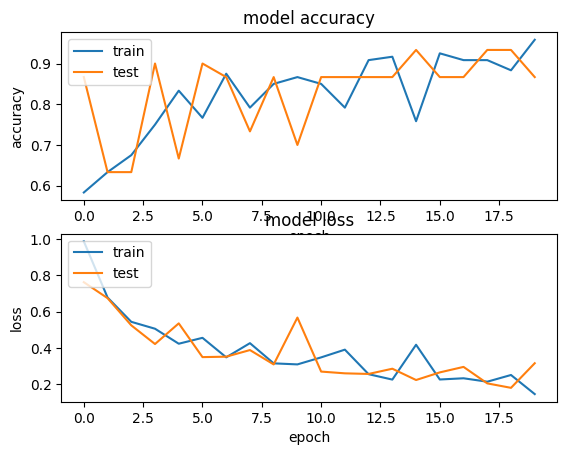

In [33]:
plt.figure()

# обобщение истории для точности
plt.subplot(211)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')

 # обобщение истории для потерь
plt.subplot(212)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

### Выведем фактическое и прогнозируемое значение

In [35]:
y_pred = model.predict(X_valid)

actual = np.argmax(y_valid, axis = 1)
predicted = np.argmax(y_pred, axis = 1)

print(f"Фактическое:    {actual}")
print(f"Предсказанное: {predicted}")

1/1 [==============================] - 0s 22ms/step
Фактическое:    [1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0]
Предсказанное: [1 0 2 1 1 0 1 2 2 1 1 0 0 0 0 1 2 1 1 2 0 1 0 2 1 2 2 2 0 0]
